## Zadania do samodzielnego wykonania

1.

Proszę pobrać plik treatment.txt, zawierający wyniki analizy nowego leku. W dwóch pierwszych kolumnach znajduje się stężenie dwóch składników w próbce krwi, w trzeciej - informacja o tym, czy lek zadziałał. Dane nie są znormalizowane. Proszę znormalizować dane, podzielić je na zbiór uczący i testujący w proporcjach 80-20 (należy pamiętać o proporcjach klas), zaproponować wielowarstwową sieć neuronową i zbadać jej skuteczność dla różnych ilości warstw i neuronów w tych warstwach. Proszę narysować jak sieć dokonała podziału w zbiorze dla kilku sieci (zarówno tych z dobrymi, jak i złymi wynikami) i jak wygląda poprawny podział zbioru. Proszę przedstawić wyniki dla 5-8 różnych struktur sieci.

2.

Proszę pobrać zbiór ręcznie pisanych cyfr z https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits (można to zrobić funkcją datasets.load_digits( ) w sklearnie). Proszę sprawdzić skuteczność klasyfikacji na tym zbiorze za pomocą wielowarstwowej sieci neuronowej.

3.

Proszę sprawdzić, jak zmieni się poprawność klasyfikacji na zbiorze ręcznie pisanych cyfr dla różnych architektur sieci, funkcji aktywacji, ilości epok uczenia i algorytmów uczenia. Proszę zbadać wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD. Dla najciekawszych przykładów proszę wypisać macierze pomyłek.

4.

Proszę pobrać zbiór yeast z UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Yeast). Proszę we własnym zakresie dokonać wstępnej analizy i przygotowania tego zbioru (uwaga, wymagana jest zamiana etykiet tekstowych w ostatniej kolumnie na liczbowe - można je zamienić ręcznie albo przy użyciu takich narzędzi jak https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html, proszę jednak pamiętać, że nie musi on ułożyć tych etykiet po kolei). Proszę pamiętać, że liczności różnych klas wewnątrz zbioru są _bardzo_ nierówne. Proszę spróbować osiągnąć jak najlepsze wyniki i narysować dla nich macierz pomyłek (dla zbioru uczącego i testującego). Czy trafność na poziomie 0.5 dla takiego zbioru jest dobra? Mogą państwo zbadać też czas wykonywania funkcji fit dla różnych konfiguracji sieci.

#### Materiały:

Dokumentacja:

* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

Dla bardziej ambitnych polecamy zbiór ręcznie pisanych cyfr MNIST.

In [1]:
%pip install -U scikit-learn



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [62]:
from sklearn import preprocessing
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



zad1

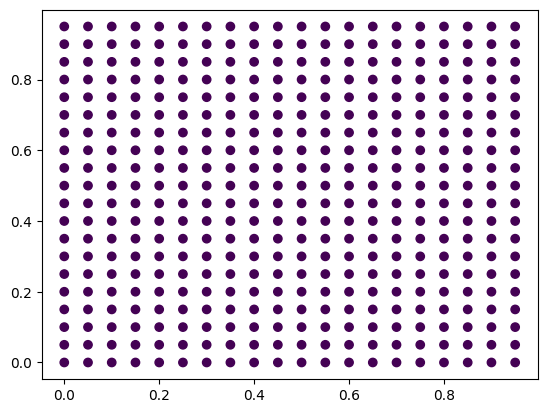

In [47]:
arr = np.loadtxt('treatment.txt', delimiter=',')

norm_arr = preprocessing.normalize(arr[:,[0,1]], norm='max', axis=0, copy=True)

x_train, x_test, y_train, y_test =train_test_split(norm_arr,arr[:,2], test_size=0.2, stratify=arr[:,2])


clf = MLPClassifier(solver= 'adam' , hidden_layer_sizes=(2,5), max_iter=1000, random_state=1)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

xx, yy = np.meshgrid(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05))
test_points = np.transpose(np.vstack((np.ravel(xx),np.ravel(yy))))

prediction = clf.predict(test_points)
plt.scatter(test_points[:,0], test_points[:,1], c=prediction)



/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


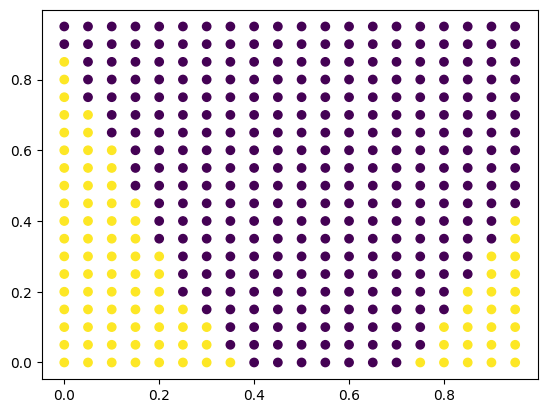

In [48]:
arr = np.loadtxt('treatment.txt', delimiter=',')

norm_arr = preprocessing.normalize(arr[:,[0,1]], norm='max', axis=0, copy=True)

x_train, x_test, y_train, y_test =train_test_split(norm_arr,arr[:,2], test_size=0.2, stratify=arr[:,2])


clf = MLPClassifier(solver= 'adam' , hidden_layer_sizes=(5,5), max_iter=1000, random_state=1)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

xx, yy = np.meshgrid(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05))
test_points = np.transpose(np.vstack((np.ravel(xx),np.ravel(yy))))

prediction = clf.predict(test_points)
plt.scatter(test_points[:,0], test_points[:,1], c=prediction)

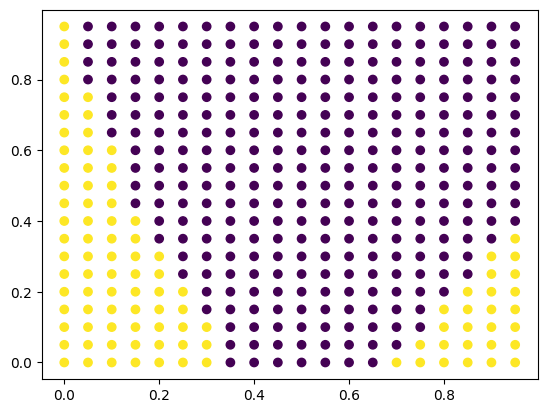

In [49]:
arr = np.loadtxt('treatment.txt', delimiter=',')

norm_arr = preprocessing.normalize(arr[:,[0,1]], norm='max', axis=0, copy=True)

x_train, x_test, y_train, y_test =train_test_split(norm_arr,arr[:,2], test_size=0.2, stratify=arr[:,2])


clf = MLPClassifier(solver= 'adam' , hidden_layer_sizes=(10,10), max_iter=1000, random_state=1)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

xx, yy = np.meshgrid(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05))
test_points = np.transpose(np.vstack((np.ravel(xx),np.ravel(yy))))

prediction = clf.predict(test_points)
plt.scatter(test_points[:,0], test_points[:,1], c=prediction)

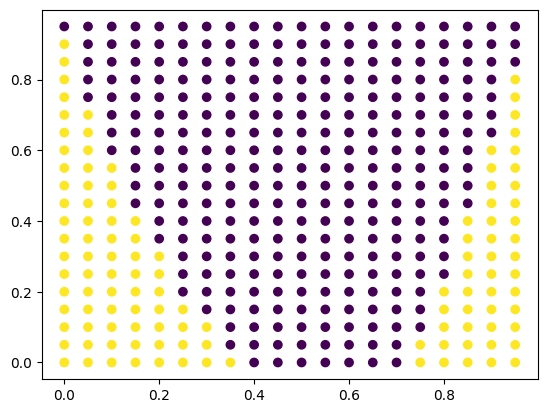

In [50]:
arr = np.loadtxt('treatment.txt', delimiter=',')

norm_arr = preprocessing.normalize(arr[:,[0,1]], norm='max', axis=0, copy=True)

x_train, x_test, y_train, y_test =train_test_split(norm_arr,arr[:,2], test_size=0.2, stratify=arr[:,2])


clf = MLPClassifier(solver= 'adam' , hidden_layer_sizes=(10,10,10), max_iter=1000, random_state=1)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

xx, yy = np.meshgrid(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05))
test_points = np.transpose(np.vstack((np.ravel(xx),np.ravel(yy))))

prediction = clf.predict(test_points)
plt.scatter(test_points[:,0], test_points[:,1], c=prediction)

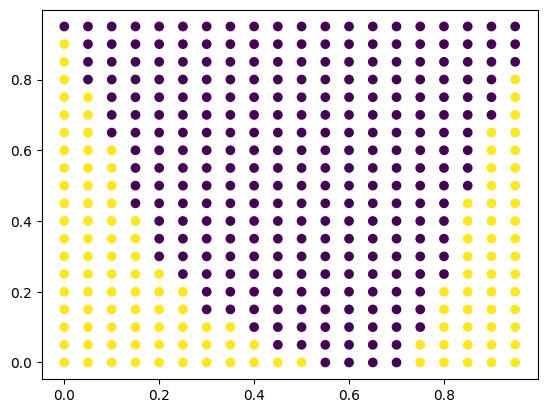

In [51]:
arr = np.loadtxt('treatment.txt', delimiter=',')

norm_arr = preprocessing.normalize(arr[:,[0,1]], norm='max', axis=0, copy=True)

x_train, x_test, y_train, y_test =train_test_split(norm_arr,arr[:,2], test_size=0.2, stratify=arr[:,2])


clf = MLPClassifier(solver= 'adam' , hidden_layer_sizes=(50,50,50), max_iter=1000, random_state=1)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

xx, yy = np.meshgrid(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05))
test_points = np.transpose(np.vstack((np.ravel(xx),np.ravel(yy))))

prediction = clf.predict(test_points)
plt.scatter(test_points[:,0], test_points[:,1], c=prediction)

zad2

In [72]:
x_digits, y_digits = datasets.load_digits(return_X_y=True)
x_train, x_test, y_train, y_test =train_test_split(x_digits,y_digits, test_size=0.2, stratify=y_digits)

clf = MLPClassifier(solver= 'adam' , hidden_layer_sizes=(50,50,50), max_iter=1000, random_state=1)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))
display(pd.DataFrame(confusion_matrix(y_test,clf.predict(x_test))))

# clf = MLPClassifier(solver= 'adam' , hidden_layer_sizes=(10,10,10), max_iter=1000, random_state=1)
# clf.fit(x_train, y_train)
# print(clf.score(x_test, y_test))
# display(pd.DataFrame(confusion_matrix(y_test,clf.predict(x_test))))

clf = MLPClassifier(solver= 'adam' , hidden_layer_sizes=(5,5,5), max_iter=1000, random_state=1)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))
display(pd.DataFrame(confusion_matrix(y_test,clf.predict(x_test))))


0.9666666666666667


,0,1,2,3,4,5,6,7,8,9
0,34,0,0,0,1,0,1,0,0,0
1,0,36,0,0,0,0,0,0,1,0
2,0,1,34,0,0,0,0,0,0,0
3,0,0,0,37,0,0,0,0,0,0
4,1,0,0,0,33,0,0,0,2,0
5,0,0,0,0,0,36,0,0,0,0
6,0,0,0,0,0,0,35,0,1,0
7,0,0,0,0,0,0,0,34,1,1
8,0,1,0,0,0,0,0,0,34,0
9,0,0,0,0,0,0,0,0,1,35


0.9111111111111111


,0,1,2,3,4,5,6,7,8,9
0,35,0,0,0,0,0,1,0,0,0
1,0,34,1,1,0,0,0,0,0,1
2,0,0,31,3,0,1,0,0,0,0
3,0,2,0,33,0,0,0,0,2,0
4,1,1,0,0,32,0,0,0,0,2
5,0,1,1,0,0,33,0,0,1,0
6,0,0,0,0,0,1,35,0,0,0
7,0,0,0,0,0,1,0,33,0,2
8,0,1,1,0,1,1,0,0,30,1
9,0,0,0,2,0,0,0,2,0,32


za3

In [95]:
clf = MLPClassifier(activation="relu", solver= 'adam' , hidden_layer_sizes=(5,5), max_iter=2000, random_state=1, learning_rate='invscaling')
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))
display(pd.DataFrame(confusion_matrix(y_test,clf.predict(x_test))))

clf = MLPClassifier(activation="relu", solver= 'sgd' , hidden_layer_sizes=(5,5), max_iter=2000, random_state=1, learning_rate='invscaling')
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))
display(pd.DataFrame(confusion_matrix(y_test,clf.predict(x_test))))

0.9055555555555556


,0,1,2,3,4,5,6,7,8,9
0,35,0,0,0,1,0,0,0,0,0
1,0,33,0,1,0,0,0,0,2,1
2,0,0,33,0,0,0,1,0,1,0
3,0,0,1,35,0,0,0,0,1,0
4,1,2,0,0,33,0,0,0,0,0
5,0,0,0,0,0,35,0,0,0,1
6,0,1,0,0,0,2,32,0,1,0
7,0,0,0,2,0,1,0,31,1,1
8,0,1,3,0,1,2,0,0,28,0
9,0,0,0,1,0,0,0,2,2,31


0.10277777777777777


,0,1,2,3,4,5,6,7,8,9
0,35,0,0,0,0,0,1,0,0,0
1,35,1,0,0,0,0,1,0,0,0
2,34,0,0,0,0,1,0,0,0,0
3,37,0,0,0,0,0,0,0,0,0
4,27,1,0,0,0,0,8,0,0,0
5,35,0,0,0,0,1,0,0,0,0
6,36,0,0,0,0,0,0,0,0,0
7,36,0,0,0,0,0,0,0,0,0
8,35,0,0,0,0,0,0,0,0,0
9,36,0,0,0,0,0,0,0,0,0


Wnioski: jak damy za mało epok to będzie za mało czasu, zeby sieć się nauczyła i przez to dokładność jest mała.
        gotowych sieci nie da się przeuczyć nawet duzymi ilosciami epok(nawet 100000).

        dla 5x5x5 2000 epok:
        relu 91%
        logistic 65%
        tanh 83%
        identity 93%

        solver:
        adam 93% 
        sgd 91%
        lbfgs 93%

        adam vs sgd
        dla 2x2 logistic 2000 epok 37% do 28%
        dla 2x2 logistic 1000 epok 36,6% do 24,7%

        dla 5x5 relu 2000 epok learining_rate = invscaling 90,5% do 10,2%
        